In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def load_data(batch_size=64):
  # Compose allows us to have multiple transformations to occur
  # and resize all images to 224x224
  transform_it = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

  # Save the paths of each of the different types of data that are located in my drive 
  train_path = '/content/gdrive/MyDrive/Primary Models/sample_large/train'
  val_path = '/content/gdrive/MyDrive/Primary Models/sample_large/val'
  test_path = '/content/gdrive/MyDrive/Primary Models/sample_large/test'

  # Load all of the data from my google drive
  train_data = torchvision.datasets.ImageFolder(train_path, transform=transform_it)
  val_data = torchvision.datasets.ImageFolder(val_path, transform=transform_it)
  test_data = torchvision.datasets.ImageFolder(test_path, transform=transform_it)

  return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = load_data(batch_size=64)

In [ ]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, train_data, val_data, batch_size=64, learning_rate=0.001, num_epochs=20):
    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              #print("GPU is Available")
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
            n += 1

        # Print the accuracies of validation and training for each epoch to observe how it changes over time 
        print("epoch number: ", epoch+1, "Training accuracy: ",train_acc[epoch], "Validation accuracy: ", val_acc[epoch])
        # Save the current model (checkpoint) to a file
        #model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        #torch.save(model.state_dict(), model_path)      

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
vggModel = torchvision.models.vgg11(pretrained=True)

In [ ]:
#vggModel.fc=torch.nn.Linear(in_features=512, out_features=4)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.273542600896861 Validation accuracy:  0.24475524475524477
epoch number:  2 Training accuracy:  0.13901345291479822 Validation accuracy:  0.14685314685314685
epoch number:  3 Training accuracy:  0.26905829596412556 Validation accuracy:  0.25874125874125875
epoch number:  4 Training accuracy:  0.2556053811659193 Validation accuracy:  0.2517482517482518
epoch number:  5 Training accuracy:  0.22869955156950672 Validation accuracy:  0.22377622377622378
epoch number:  6 Training accuracy:  0.21674140508221226 Validation accuracy:  0.21678321678321677
epoch number:  7 Training accuracy:  0.2242152466367713 Validation accuracy:  0.23076923076923078
epoch number:  8 Training accuracy:  0.2436472346786248 Validation accuracy:  0.24475524475524477
epoch number:  9 Training accuracy:  0.2750373692077728 Validation accuracy:  0.22377622377622378
epoch number:  10 Training accuracy:  0.2526158445440957 Validation accuracy

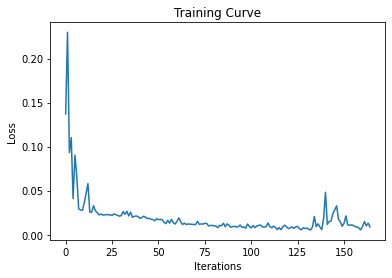

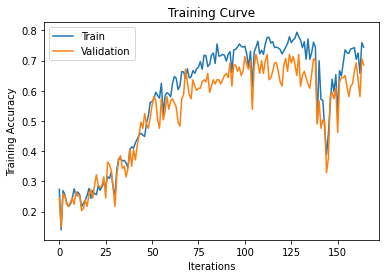

Final Training Accuracy: 0.7443946188340808
Final Validation Accuracy: 0.6853146853146853


In [ ]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  vggModel = vggModel.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 64
train_data, val_data, test_data = load_data(batch_size=64)
train(vggModel, train_data, val_data, batch_size=64, learning_rate=0.001, num_epochs=15)

In [ ]:
use_cuda = True

if use_cuda and torch.cuda.is_available():
  vggModel = vggModel.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 64
train_data, val_data, test_data = load_data(batch_size=15)
train(vggModel, train_data, val_data, batch_size=15, learning_rate=0.001, num_epochs=15)

CUDA is available!  Training on GPU ...


KeyboardInterrupt: ignored